Anirudh Margam

CSCE439-500

730002982

# Questions
1. Load the intrusion dataset intrusion.csv into your Jupyter notebook

2. Create a scatter plot (including a legend, title, and x and y labels) using matplotlib.pyplot
* a. Attribute 1 and Attribute 2 (colored by “Intrusion”)
* b. Attribute 2 and Attribute 3 (colored by “Intrusion”)
* (These two plots should lead you to conclude that the Intrusion dataset is separable). NOTE! You will not use these plots for the rest of the homework. You will also not use only two of the attributes again. Your training below should be with all 3 attributes.

3. Split the data into train and test sets using sklearn

4. Train a Support Vector Classifier using the following kernels
* a. Poly
* b. Linear
* c. RBF

5. Output confusion matrices and classification reports of the test set with each of your SV classifiers.
* a. An intrusion value of 1 is a positive (intrusion). As with many cyber security datasets, this one is imbalanced (many more negatives than positives). Your notebook should clearly label true positives, false positives, true negatives and false negatives (i.e. don’t just print the results of the confusion matrix method-- you need to explicitly output which number is which).

6. Train a Random Forest Classifier on the dataset

7. Output a confusion matrix and classification report of the test set with your Random Forest model.
* a. As with the support vector machine, your notebook should clearly label true positives, false positives, true negatives and false negatives

## GRADING:
* 5 points – correctly loads intrusion.csv into a Jupyter notebook
* 10 points – creates scatter plots with legends, titles and labels
* 10 points – splits data correctly into test and train
* 10 points – creates and trains 3 SVC models
* 10 points – outputs confusion matrix, classification report and clearly labels TP, FP, TN, FN for SVM
* 10 points – creates and trains Random Forest Classifier
* 10 points – outputs confusion matrix and classification report and clearly labels TP, FP, TN, FN for RFC
* 10 points – uses Markdown appropriately to create an easy to read program with properly labeled results

## APPROACH:
1. imports + load dataset files  (q1)
2. scatterplots (q2)
3. create train and test sets (q3)
4. polynomial kernel SVC (q4)
5. linear kernel SVC (q4)
6. rbf kernel SVC (q4)
7. confusion matrices (q5)
8. classification reports (q5)
9. train random forest classifier (q6)
10. random forest confusion matrix (q7)
11. random forest classification report (q7)

In [134]:
# 1. imports + load dataset files (q1)
import gzip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# path to files
path_to_intrusion_csv = '/Users/animargam/cssoftware/educationlearning/tamu/csce439dataanalyticscybersecurity/Datasets/intrusion.csv'

# read into pandas df
df_intrusion = pd.read_csv(path_to_intrusion_csv, header=None)

In [135]:
df_intrusion

,0,1,2,3
0,Attribute1,Attribute2,Attribute3,Intrusion
1,2.157322350655286,1.9229469699026427,3.223735399841555,0
2,1.7116497069976015,5.534262074668741,1.5190690184043283,0
3,-1.0627101085415402,0.913823815440062,0.7150458804210742,0
4,-0.10034379400893068,6.1534630409073525,2.2500143681894684,0
...,...,...,...,...
10096,1.249902999416029,5.662992376110837,4.399132564966878,0
10097,-1.5283862877707808,6.27563105867873,0.8297506572890372,0
10098,1.8785217980029678,1.9581906902467026,1.5174793523526282,0
10099,1.9667114386009321,4.945319250257638,-2.253687169053112,0


In [148]:
# extract columns of interest
attribute1 = df_intrusion[0][1:].astype(float)
attribute2 = df_intrusion[1][1:].astype(float)
attribute3 = df_intrusion[2][1:].astype(float)
intrusion = df_intrusion[3][1:].astype(int)

# attribute1[intrusion == 0]
# attribute1[intrusion == 1]

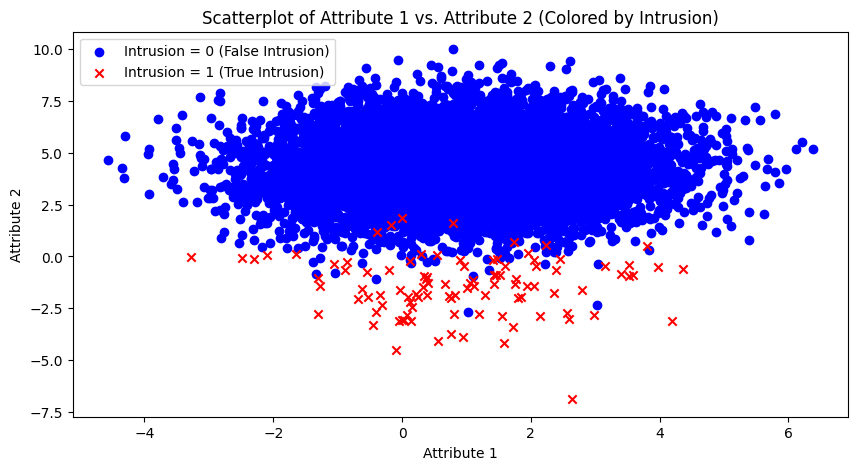

In [137]:
# 2. scatterplots (q2)
# Attribute 1 vs. Attribute 2
plt.figure(figsize=(10, 5))
plt.scatter(attribute1[intrusion == 0], attribute2[intrusion == 0], c='blue', label='Intrusion = 0 (False Intrusion)', marker='o')
plt.scatter(attribute1[intrusion == 1], attribute2[intrusion == 1], c='red', label='Intrusion = 1 (True Intrusion)', marker='x')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Scatterplot of Attribute 1 vs. Attribute 2 (Colored by Intrusion)')
plt.legend()
plt.show()

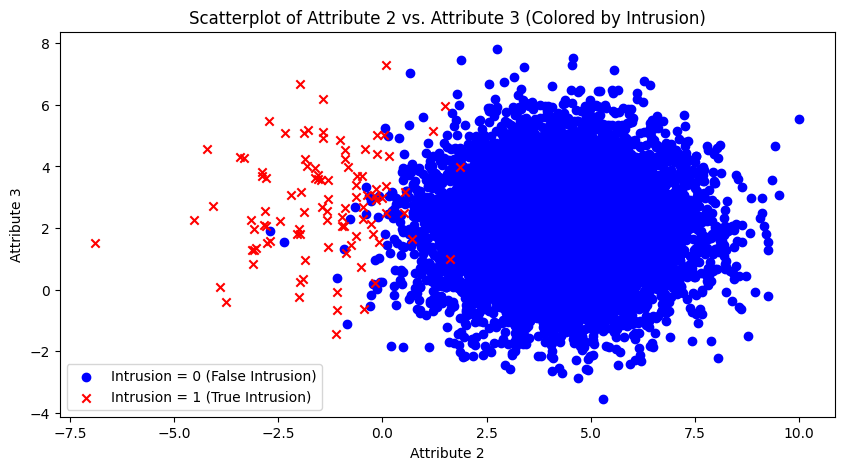

In [138]:
# Attribute 2 vs. Attribute 3
plt.figure(figsize=(10, 5))
plt.scatter(attribute2[intrusion == 0], attribute3[intrusion == 0], c='blue', label='Intrusion = 0 (False Intrusion)', marker='o')
plt.scatter(attribute2[intrusion == 1], attribute3[intrusion == 1], c='red', label='Intrusion = 1 (True Intrusion)', marker='x')
plt.xlabel('Attribute 2')
plt.ylabel('Attribute 3')
plt.title('Scatterplot of Attribute 2 vs. Attribute 3 (Colored by Intrusion)')
plt.legend()
plt.show()

## Scatterplot Analysis
The scatterplots demonstrate that the data is potentially seperable, but not obviously seperable - there is some overlap betwen the True Intrusions and the False Intrusions in both scatterplots, but the True and False datapoints do not completely overlap. This indicates that when projected to a higher dimensionality, it is likely that the data will be separable.

In [139]:
# 3. create train and test sets (q3)
data_without_header = df_intrusion.drop(0)

X = data_without_header[[0, 1, 2]]
y = data_without_header[3]
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X
# y
# df_intrusion
# data_without_header
# X_train
# X_test
# y_train
# y_test

In [140]:
# 4. polynomial kernel SVC (q4)
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_poly.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [141]:
# 5. linear kernel SVC (q4)
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [142]:
# 6. rbf kernel SVC (q4)
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [143]:
# 7. confusion matrices (q5)
y_pred_poly = svc_poly.predict(X_test)
y_pred_linear = svc_linear.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)

print("Confusion Matrix for Polynomial Kernel:")
confusion_poly = confusion_matrix(y_test, y_pred_poly)
print(f'True Positives (Intrusion correctly predicted):\t\t\t\t{confusion_poly[1, 1]}')
print(f'False Positives (No Intrusion incorrectly predicted as Intrusion):\t{confusion_poly[0, 1]}')
print(f'True Negatives (No Intrusion correctly predicted):\t\t\t{confusion_poly[0, 0]}')
print(f'False Negatives (Intrusion incorrectly predicted as No Intrusion):\t{confusion_poly[1, 0]}')

print("\nConfusion Matrix for Linear Kernel:")
confusion_linear = confusion_matrix(y_test, y_pred_linear)
print(f'True Positives (Intrusion correctly predicted):\t\t\t\t{confusion_linear[1, 1]}')
print(f'False Positives (No Intrusion incorrectly predicted as Intrusion):\t{confusion_linear[0, 1]}')
print(f'True Negatives (No Intrusion correctly predicted):\t\t\t{confusion_linear[0, 0]}')
print(f'False Negatives (Intrusion incorrectly predicted as No Intrusion):\t{confusion_linear[1, 0]}')

print("\nConfusion Matrix for RBF Kernel:")
confusion_rbf = confusion_matrix(y_test, y_pred_rbf)
print(f'True Positives (Intrusion correctly predicted):\t\t\t\t{confusion_rbf[1, 1]}')
print(f'False Positives (No Intrusion incorrectly predicted as Intrusion):\t{confusion_rbf[0, 1]}')
print(f'True Negatives (No Intrusion correctly predicted):\t\t\t{confusion_rbf[0, 0]}')
print(f'False Negatives (Intrusion incorrectly predicted as No Intrusion):\t{confusion_rbf[1, 0]}')


Confusion Matrix for Polynomial Kernel:
True Positives (Intrusion correctly predicted):				15
False Positives (No Intrusion incorrectly predicted as Intrusion):	0
True Negatives (No Intrusion correctly predicted):			2003
False Negatives (Intrusion incorrectly predicted as No Intrusion):	2

Confusion Matrix for Linear Kernel:
True Positives (Intrusion correctly predicted):				16
False Positives (No Intrusion incorrectly predicted as Intrusion):	1
True Negatives (No Intrusion correctly predicted):			2002
False Negatives (Intrusion incorrectly predicted as No Intrusion):	1

Confusion Matrix for RBF Kernel:
True Positives (Intrusion correctly predicted):				14
False Positives (No Intrusion incorrectly predicted as Intrusion):	1
True Negatives (No Intrusion correctly predicted):			2002
False Negatives (Intrusion incorrectly predicted as No Intrusion):	3


In [144]:
# 8. classification reports (q5)
print(f'\nClassification Report for Polynomial Kernel:\n{classification_report(y_test, y_pred_poly)}')
print(f'\nClassification Report for Linear Kernel:\n{classification_report(y_test, y_pred_linear)}')
print(f'\nClassification Report for RBF Kernel:\n{classification_report(y_test, y_pred_rbf)}')


Classification Report for Polynomial Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      0.88      0.94        17

    accuracy                           1.00      2020
   macro avg       1.00      0.94      0.97      2020
weighted avg       1.00      1.00      1.00      2020


Classification Report for Linear Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.94      0.94      0.94        17

    accuracy                           1.00      2020
   macro avg       0.97      0.97      0.97      2020
weighted avg       1.00      1.00      1.00      2020


Classification Report for RBF Kernel:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.93      0.82      0.87        17

    accuracy                           1.00      2020
 

In [145]:
# 9. train random forest classifier (q6)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# 10. random forest confusion matrix (q7)
y_pred_rf = rf_classifier.predict(X_test)

print('Confusion Matrix for Random Forest Classifier:')
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print(f'True Positives (Intrusion correctly predicted):\t\t\t\t{confusion_rf[1, 1]}')
print(f'False Positives (No Intrusion incorrectly predicted as Intrusion):\t{confusion_rf[0, 1]}')
print(f'True Negatives (No Intrusion correctly predicted):\t\t\t{confusion_rf[0, 0]}')
print(f'False Negatives (Intrusion incorrectly predicted as No Intrusion):\t{confusion_rf[1, 0]}')

Confusion Matrix for Random Forest Classifier:
True Positives (Intrusion correctly predicted):				16
False Positives (No Intrusion incorrectly predicted as Intrusion):	2
True Negatives (No Intrusion correctly predicted):			2001
False Negatives (Intrusion incorrectly predicted as No Intrusion):	1


In [147]:
# 11. random forest classification report (q7)
print(f'\nClassification Report for Random Forest Classifier:\n{classification_report(y_test, y_pred_rf)}')


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.89      0.94      0.91        17

    accuracy                           1.00      2020
   macro avg       0.94      0.97      0.96      2020
weighted avg       1.00      1.00      1.00      2020

